In [1]:
# import standard plotting and animation
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from matplotlib import gridspec
import autograd.numpy as np
import copy
import time
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'

# This code cell will not be shown in the HTML version of this notebook
import sys
sys.path.append('../../')
from mlrefined_libraries import multilayer_perceptron_library as multi
from mlrefined_libraries import nonlinear_superlearn_library as nonlin

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True


%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>


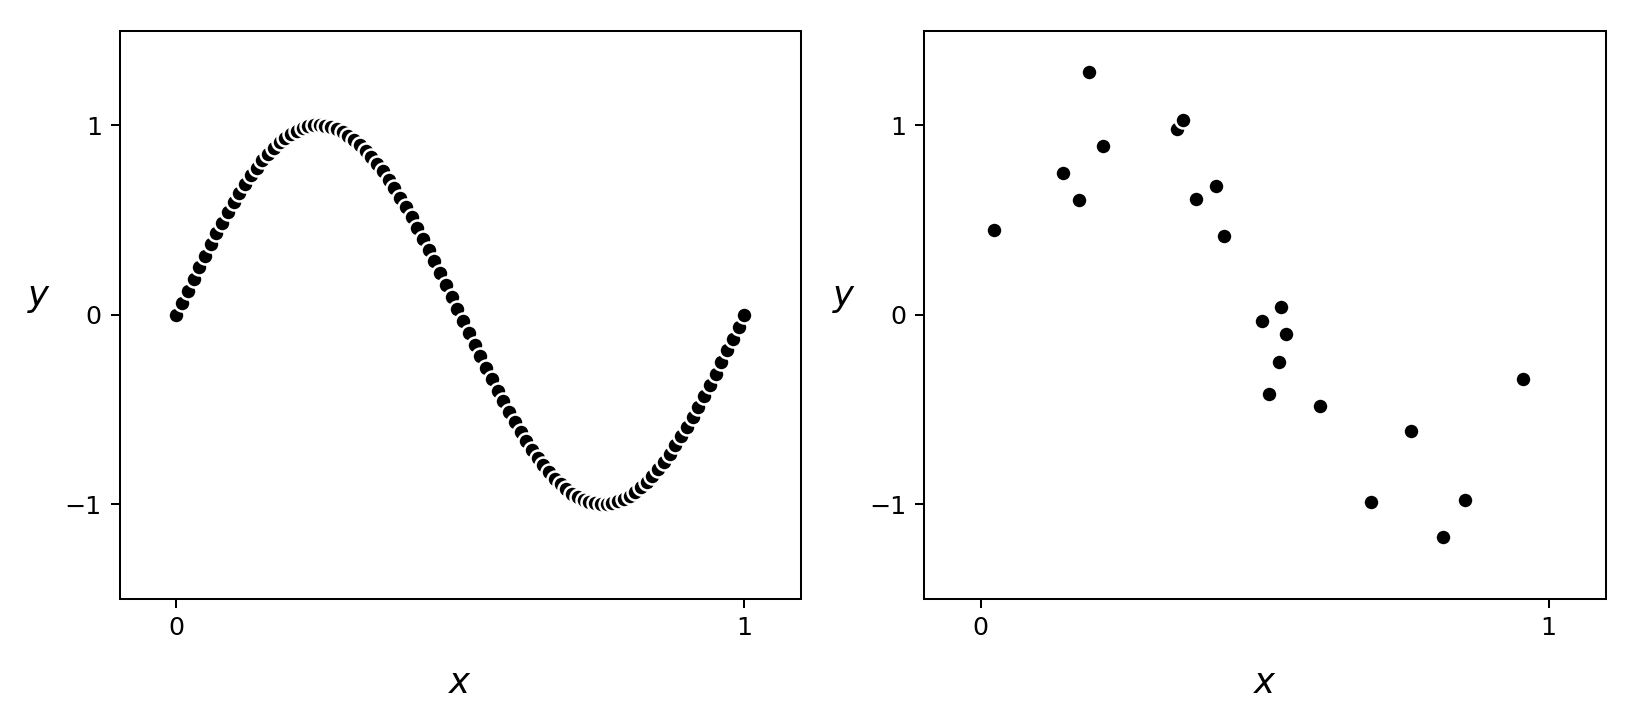

In [20]:
### plot it
# construct figure
fig = plt.figure(figsize = (9,4))
artist = fig

# create subplot with 3 panels, plot input function in center plot
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
ax1 = plt.subplot(gs[0]); 
ax2 = plt.subplot(gs[1]); 

# load in datasets
csvname2 = datapath + 'noisy_sin_sample.csv'
csvname1 = datapath + 'sin_function.csv'

data1 = np.loadtxt(csvname1,delimiter=',').T
x1 = data1[:,0]
y1 = data1[:,1]
y1.shape = (len(y1),1)

data2 = np.loadtxt(csvname2,delimiter=',').T
x2 = data2[:,0]
y2 = data2[:,1]
y2.shape = (len(y2),1)

# plot dataset left
ax1.scatter(x1,y1,c = 'k',edgecolor = 'w',s = 40,zorder = 1)
ax1.set_xlim([-0.1,1.1])
ax1.set_ylim([-1.5,1.5])
ax1.set_xlabel(r'$x$', fontsize = 14,labelpad = 10)
ax1.set_ylabel(r'$y$', rotation = 0,fontsize = 14,labelpad = 10)
ax1.set_xticks([0,1])
ax1.set_yticks([-1,0,1])


ax2.scatter(x2,y2,c = 'k',edgecolor = 'w',s = 40,zorder = 1)
ax2.set_xlim([-0.1,1.1])
ax2.set_ylim([-1.5,1.5])
ax2.set_xlabel(r'$x$', fontsize = 14,labelpad = 10)
ax2.set_ylabel(r'$y$', rotation = 0,fontsize = 14,labelpad = 10)
ax2.set_xticks([0,1])
ax2.set_yticks([-1,0,1])

plt.show()

# AUTOENCODER 

<IPython.core.display.Javascript object>


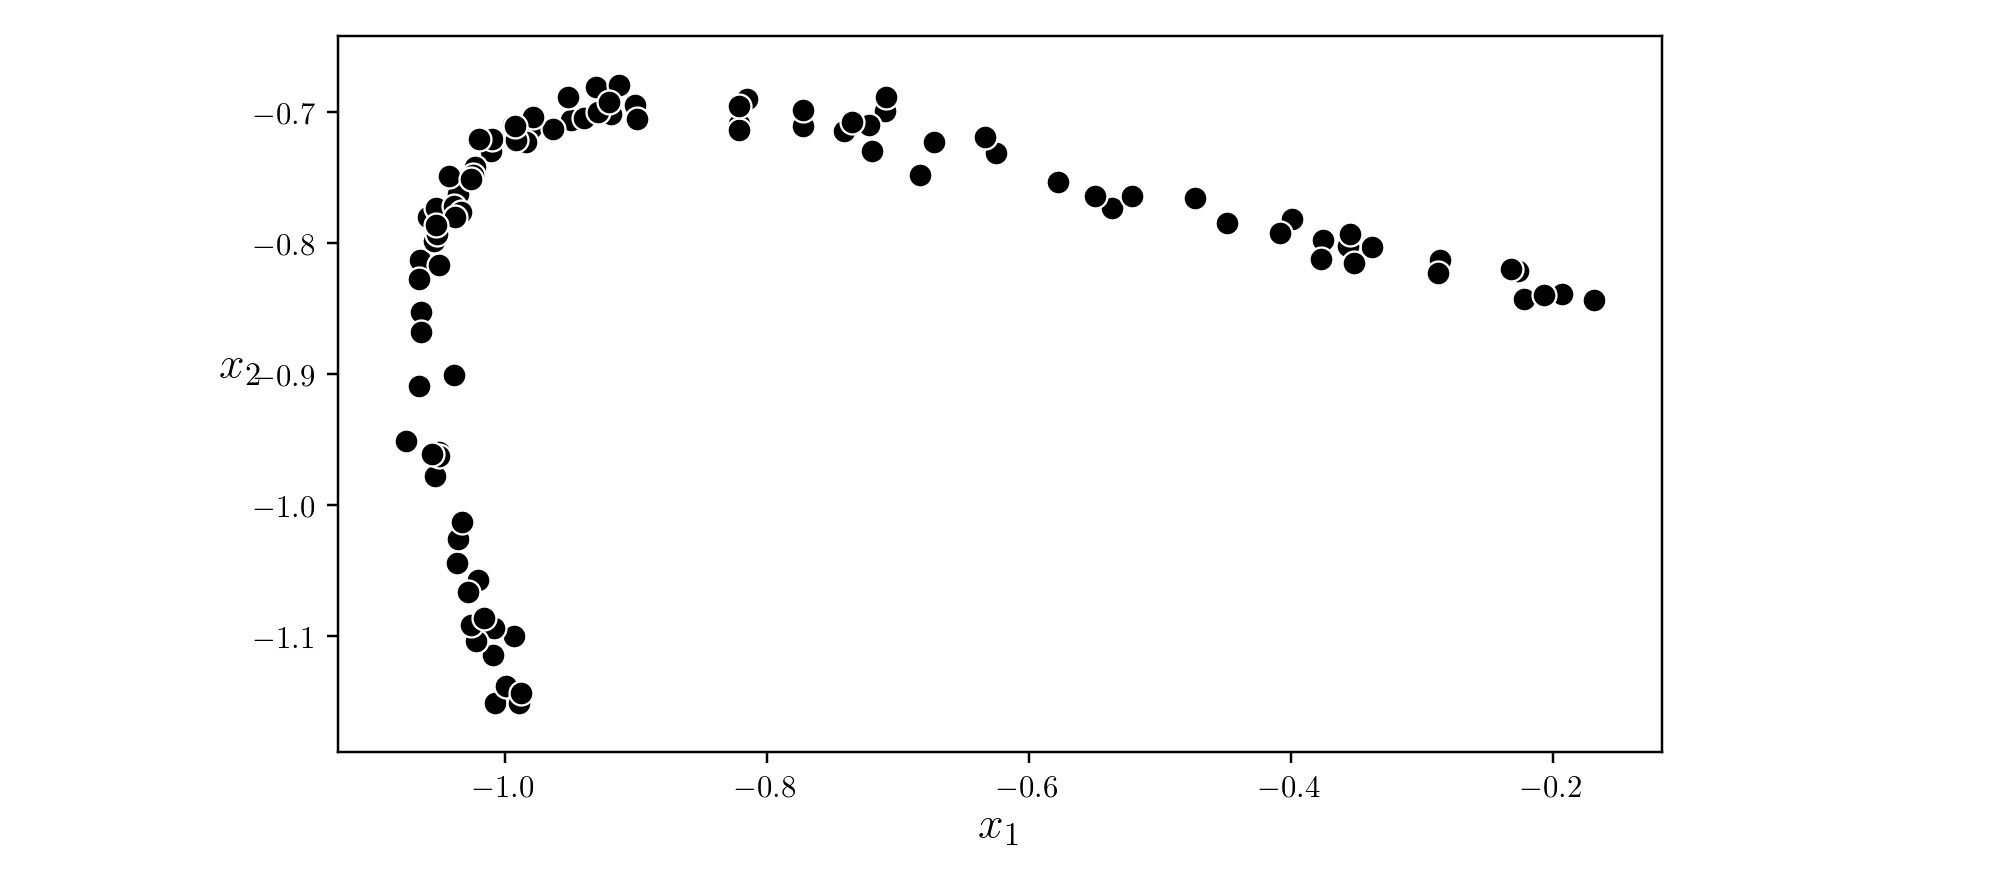

In [58]:


# import data
X = np.loadtxt(datapath + 'universal_autoencoder_samples_0.csv',delimiter=',')
# datapath = '../../mlrefined_datasets/unsuperlearn_datasets/'

# X = np.loadtxt(datapath + 'circle_data.csv',delimiter=',')


# scatter dataset
fig = plt.figure(figsize = (9,4))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0],aspect = 'equal'); 
ax.set_xlabel(r'$x_1$',fontsize = 15);ax.set_ylabel(r'$x_2$',fontsize = 15,rotation = 0);
ax.scatter(X[0,:],X[1,:],c = 'k',s = 60,linewidth = 0.75,edgecolor = 'w')
plt.show()

In [61]:
# This code cell will not be shown in the HTML version of this notebook
max_units = 20
degrees = np.arange(1,max_units)
models = []
for j in degrees:
    print (j)
    # create instance of library
    mylib = multi.basic_lib.unsuper_setup.Setup(X)

    # perform preprocessing step(s) - especially input normalization
    mylib.preprocessing_steps(normalizer = 'standard')

    # split into training and testing sets
    if j == 1:
        mylib.make_train_val_split(train_portion = 0.66)
        x_train = mylib.x_train
        x_val = mylib.x_val
    else: # use split from first run for all further runs
        mylib.x_train = x_train
        mylib.x_val = x_val
        
    # choose features
    mylib.choose_encoder(layer_sizes = [2,j,1],activation = 'tanh',scale = 0.1)
    mylib.choose_decoder(layer_sizes = [1,j,2],activation = 'tanh',scale = 0.1)

    # choose cost
    mylib.choose_cost(name = 'autoencoder')

    # fit an optimization
    mylib.fit(max_its = 2000,alpha_choice = 10**(-1),verbose = False)
    models.append(mylib)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19



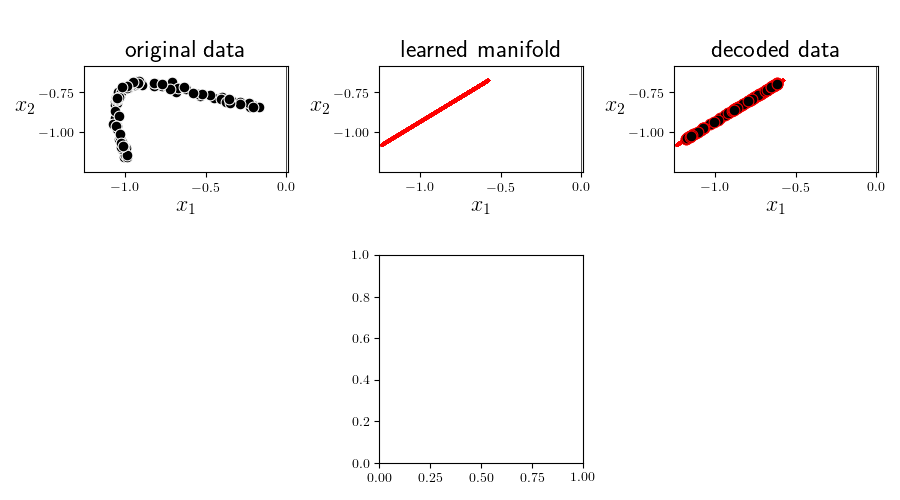
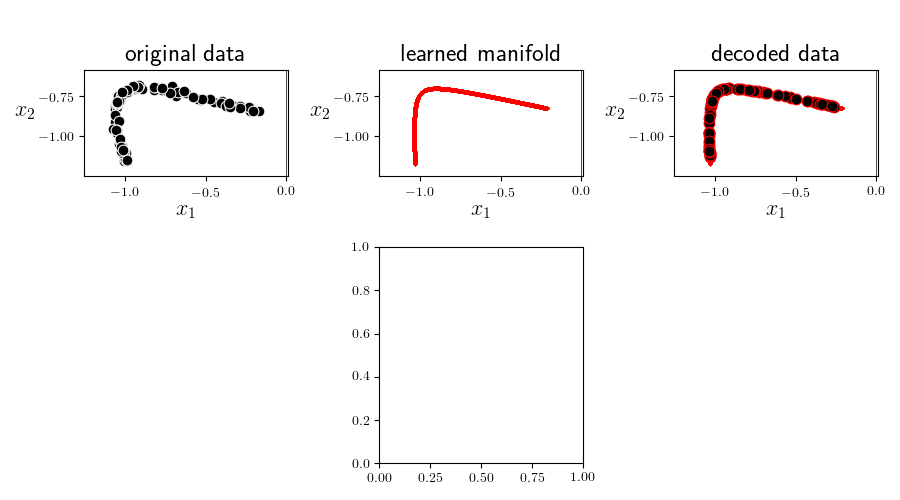
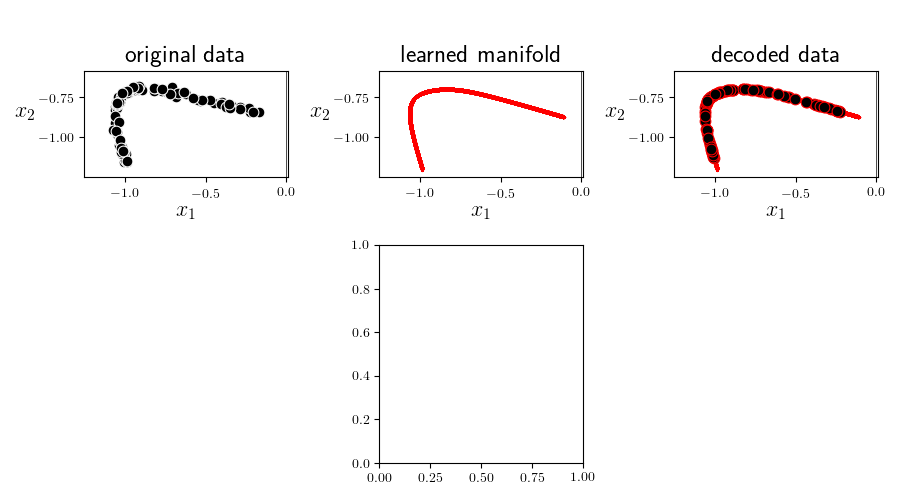
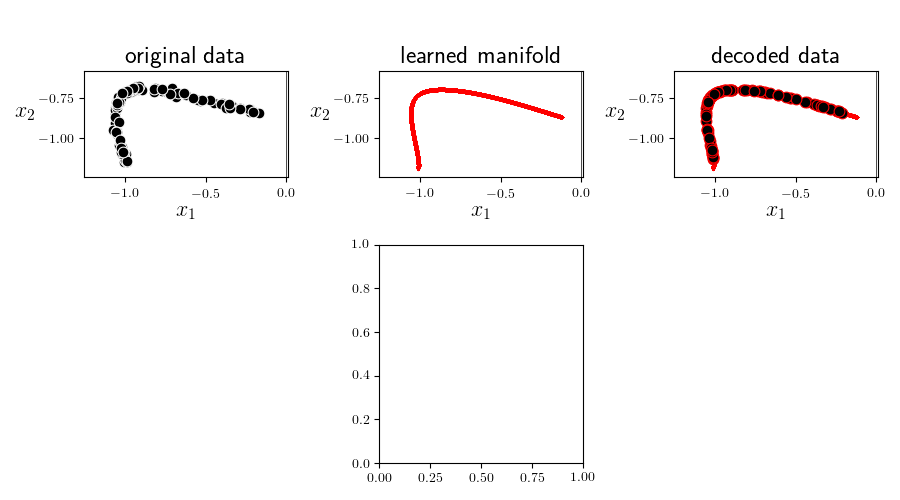
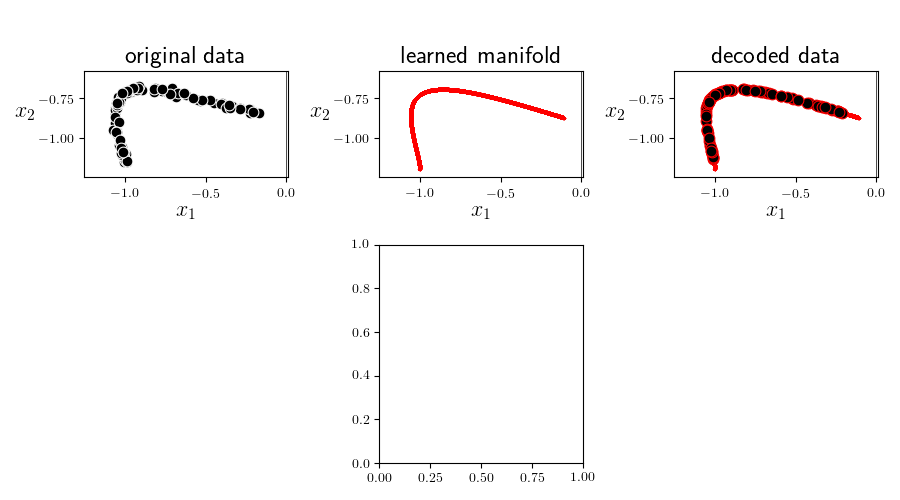
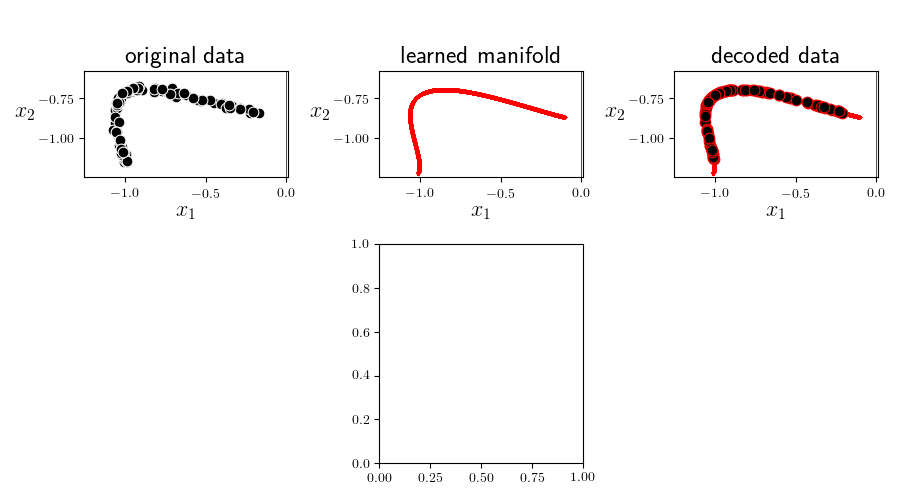
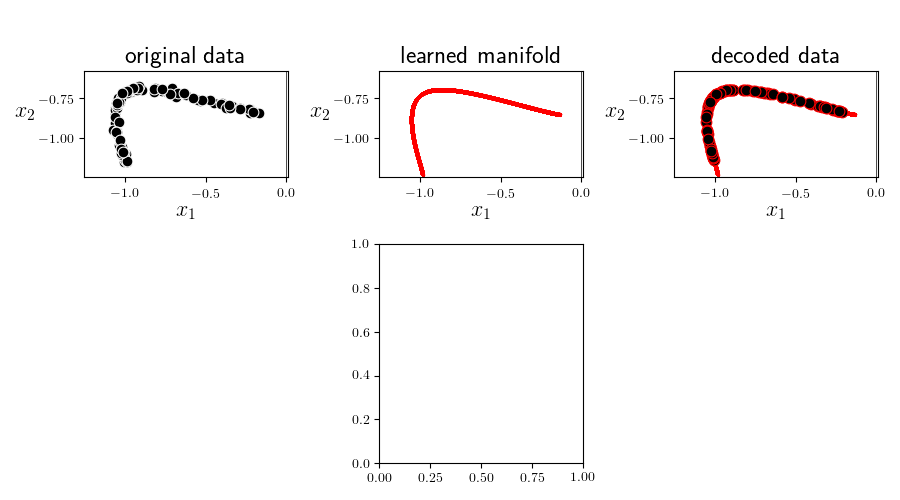
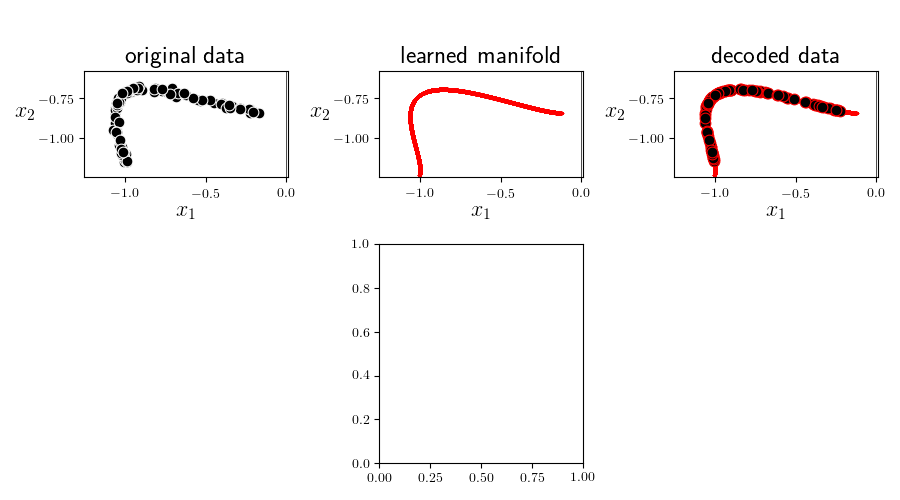
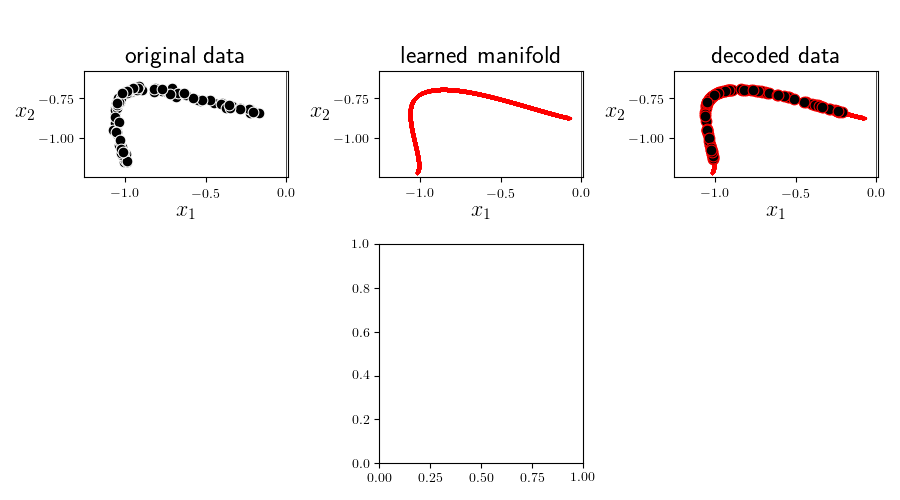
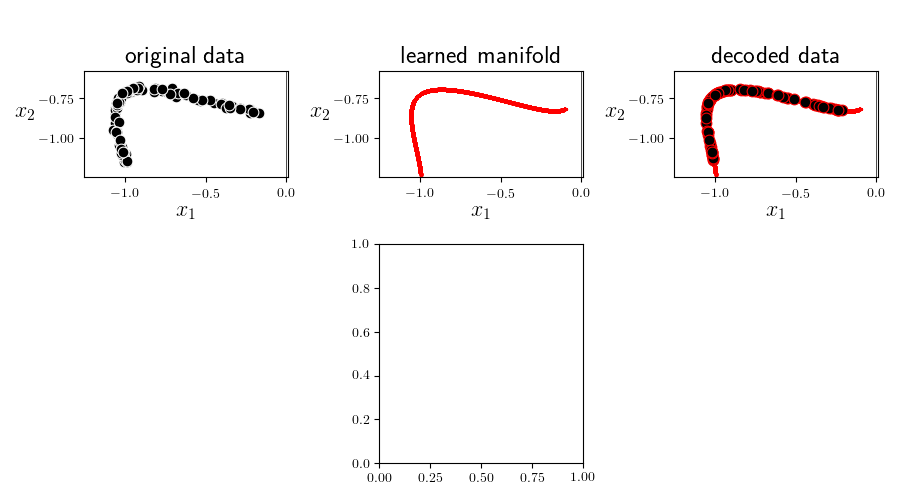
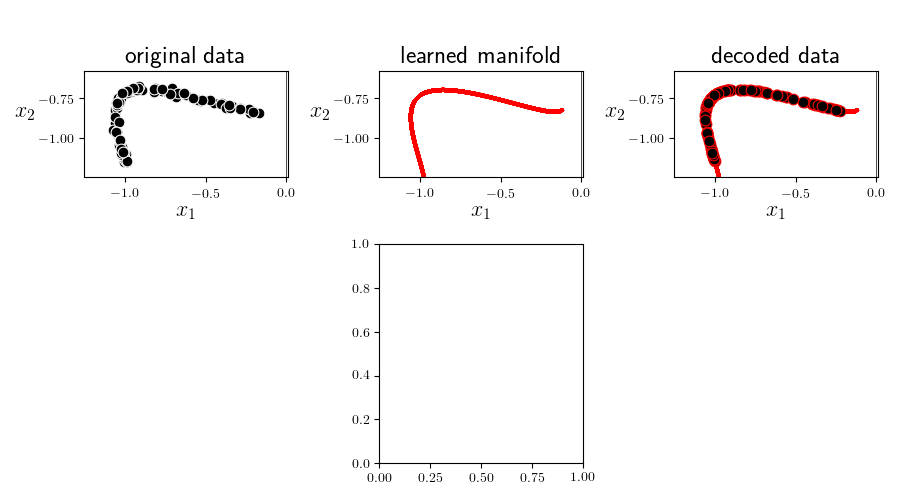
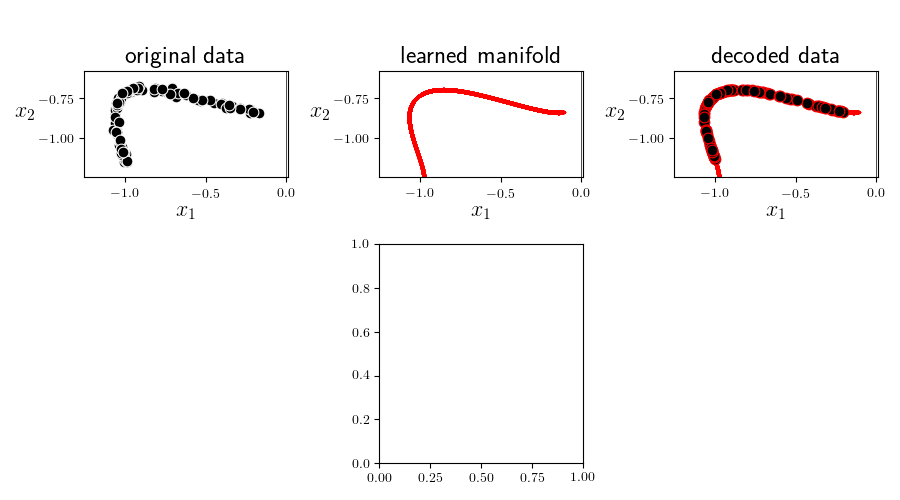
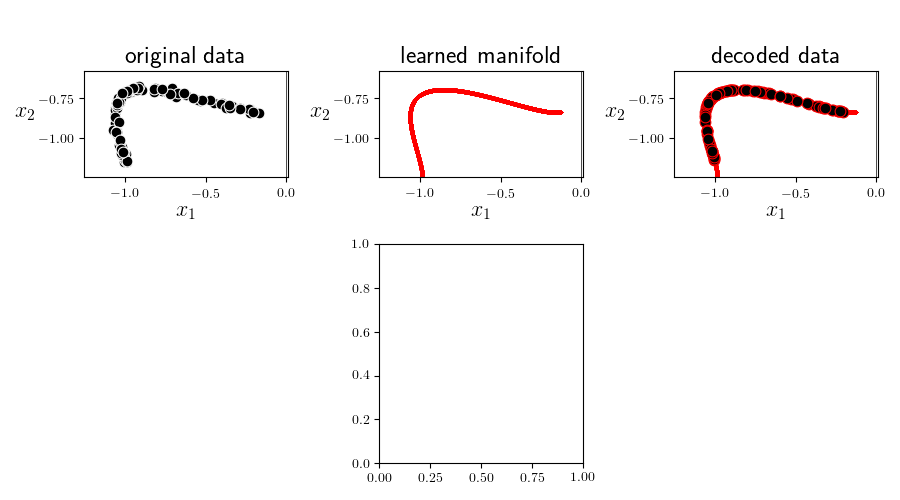
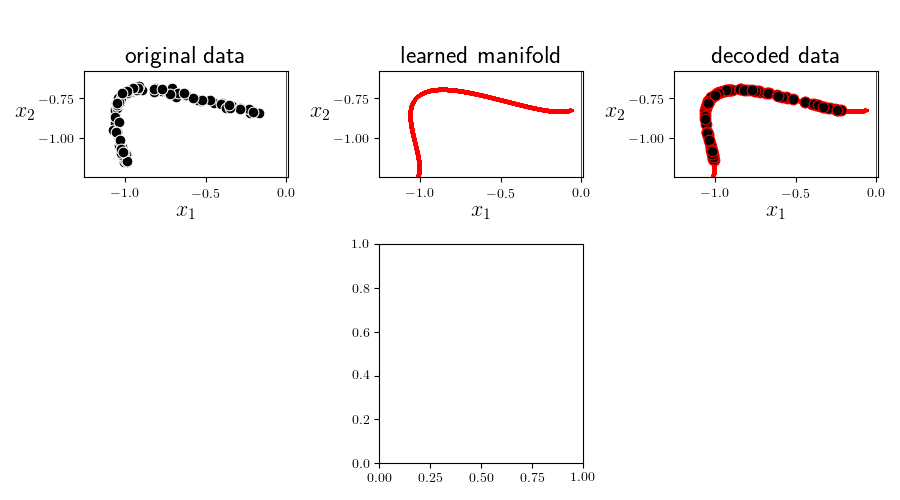
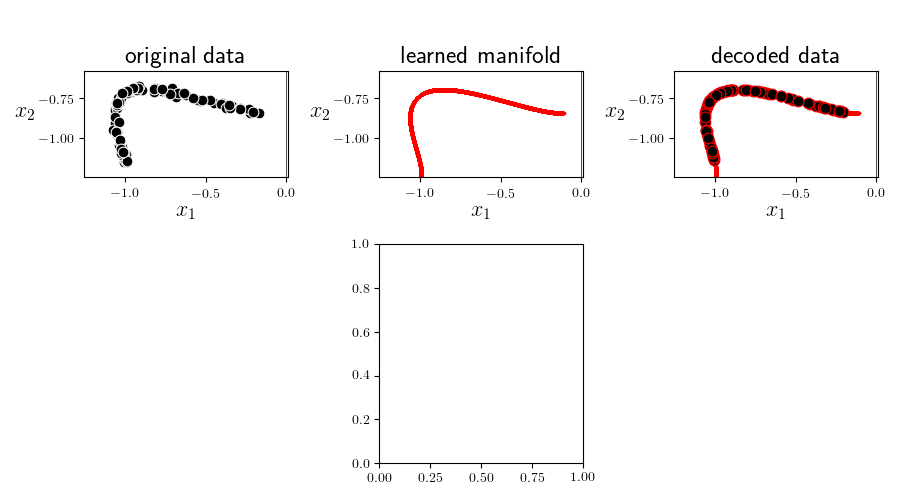
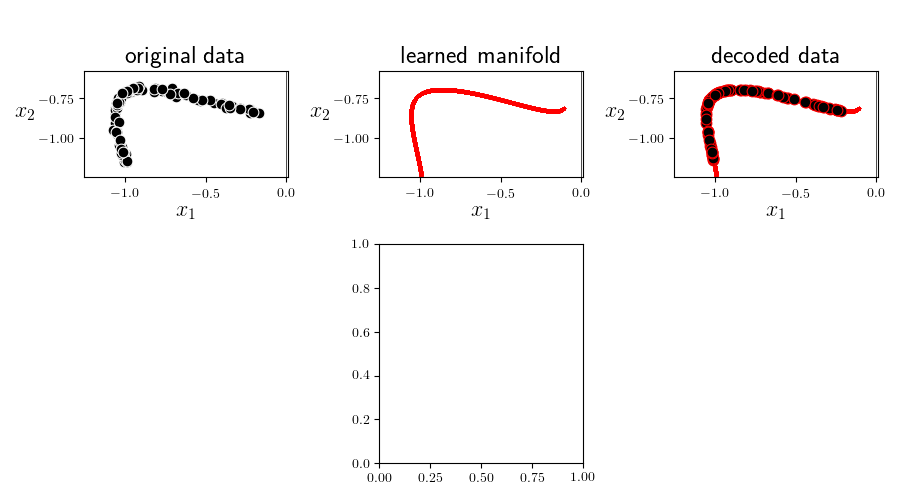
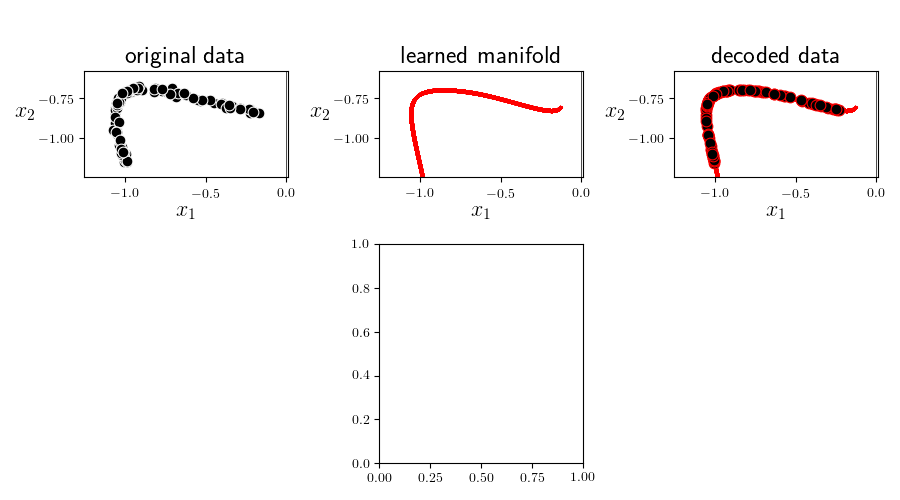
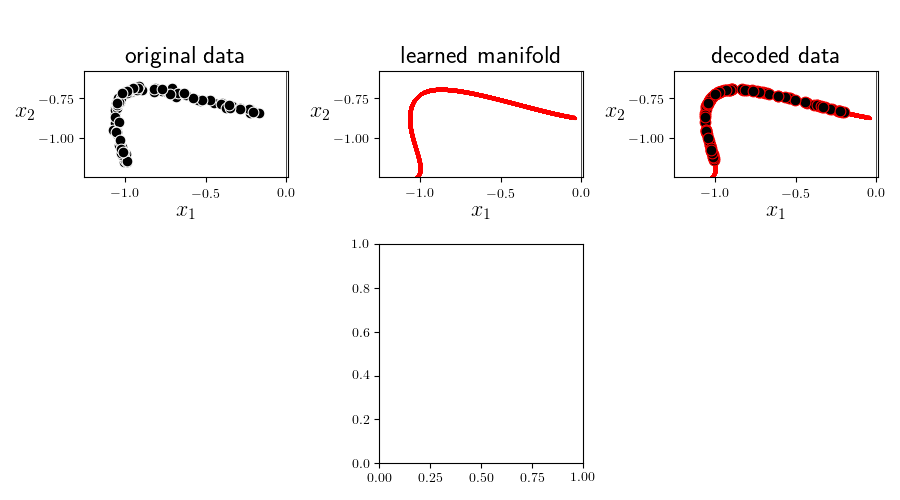
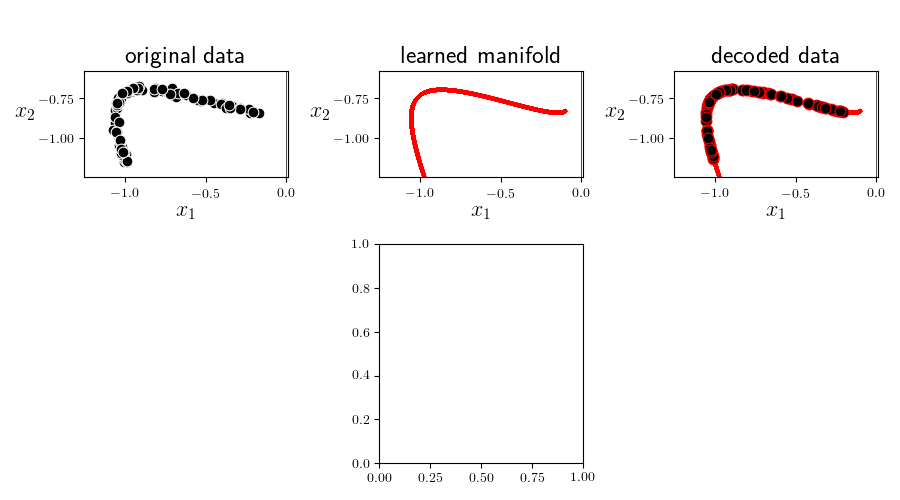

In [63]:
# This code cell will not be shown in the HTML version of this notebook
# plot results
multi.autoencoder_demos.animate_crossvals(X,models)

# trees

<IPython.core.display.Javascript object>


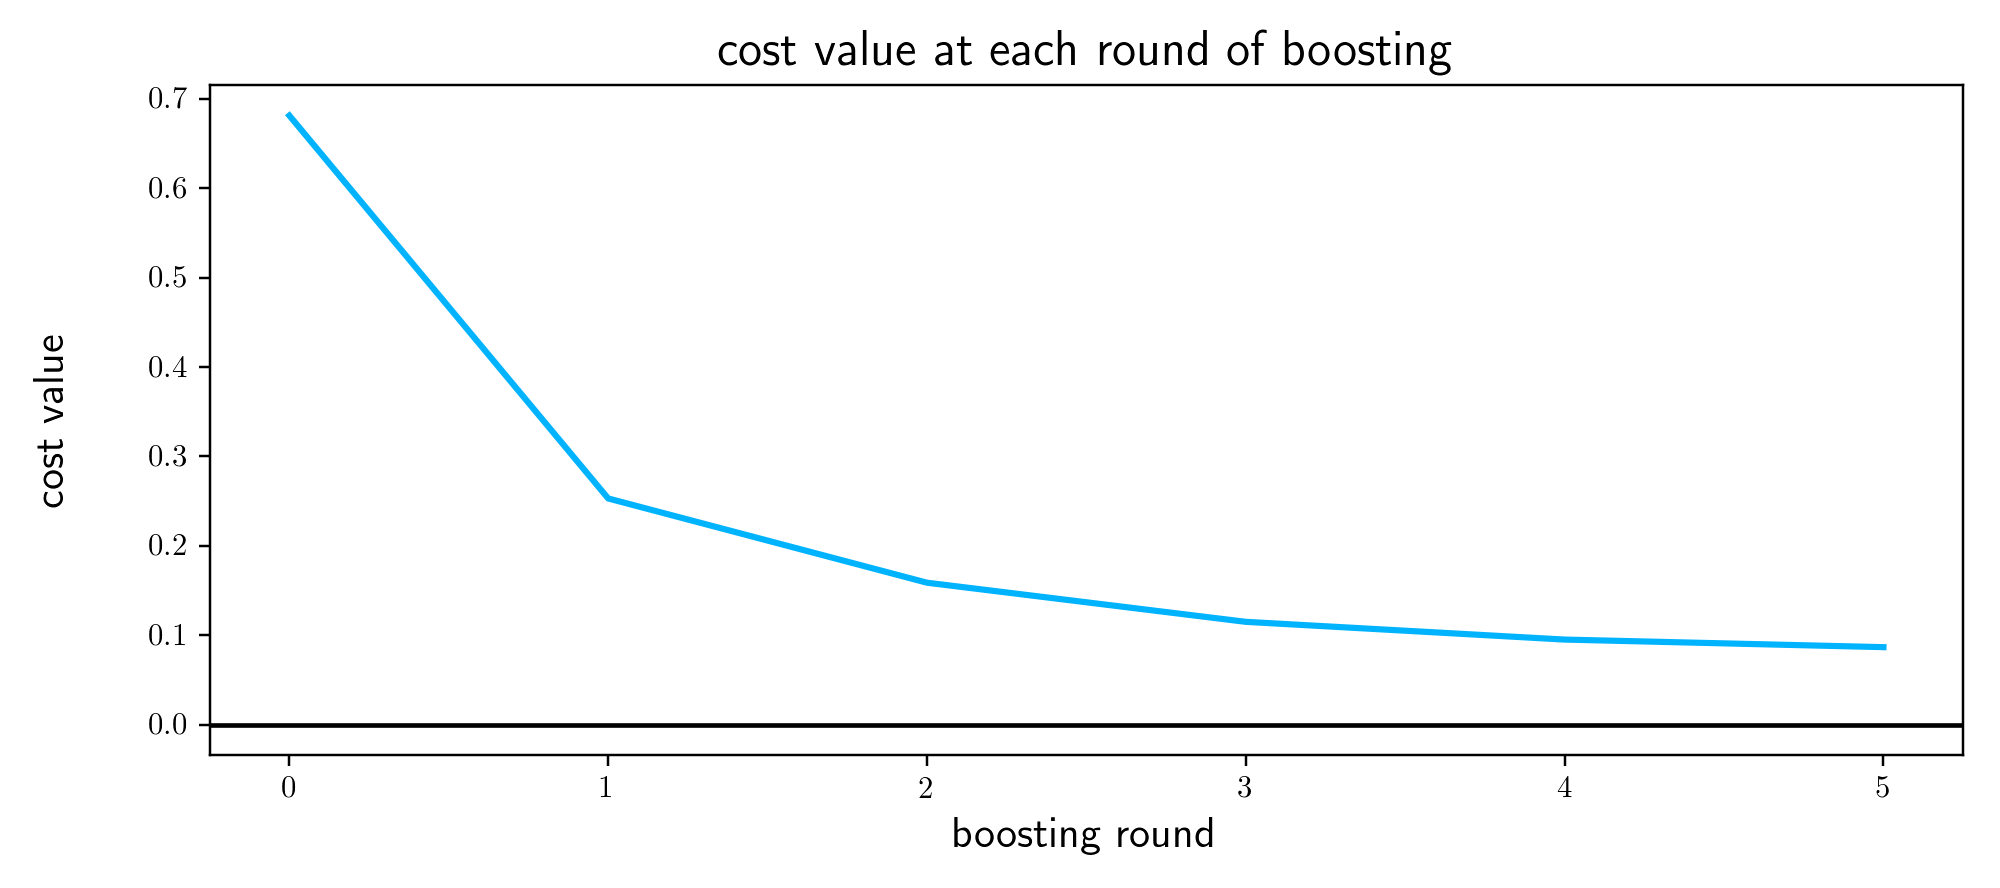

In [8]:
# import data
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:] )

# import booster
mylib = nonlin.boost_lib2.superlearn_setup.Setup(x,y)

# choose normalizer
mylib.choose_normalizer(name = 'none')

# choose cost|
mylib.choose_cost(name = 'softmax')

# choose optimizer
mylib.choose_optimizer('newtons_method',max_its=1)

# run boosting
mylib.boost(5)

# plot history
mylib.plot_history()

# trees

<IPython.core.display.Javascript object>


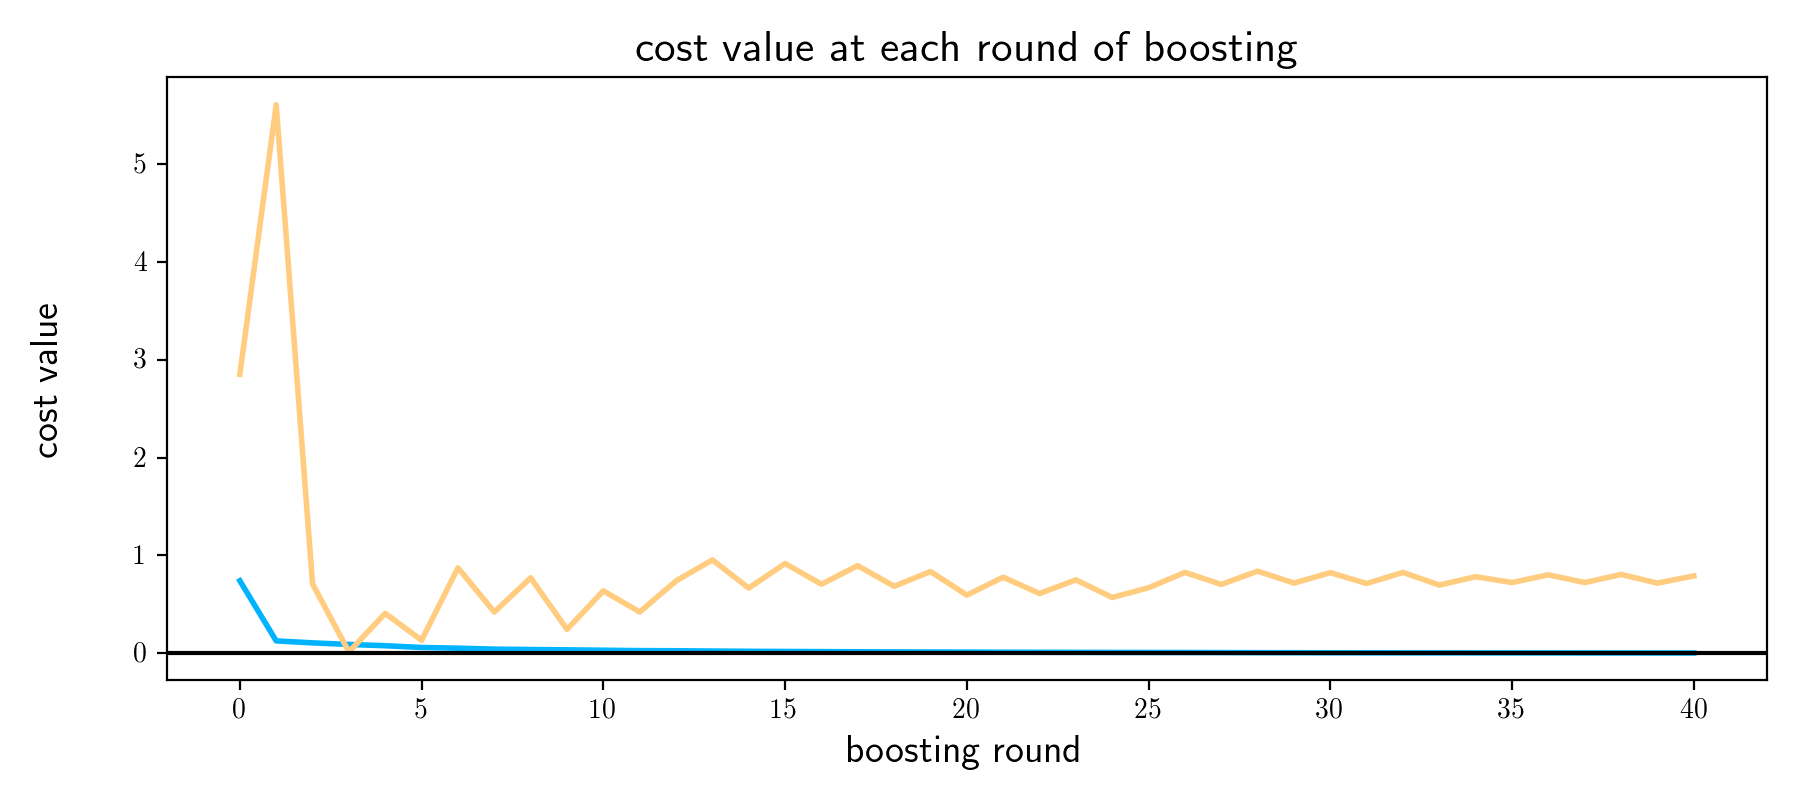

In [24]:
# import data
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:] )

# import booster
mylib2 = nonlin.boost_lib3.superlearn_setup.Setup(x,y)

# choose normalizer
mylib2.choose_normalizer(name = 'standard')

# choose normalizer
mylib2.make_train_valid_split(train_portion = 0.66)

# choose cost|
mylib2.choose_cost(name = 'least_squares')

# choose optimizer
mylib2.choose_optimizer('newtons_method',max_its=1)

# run boosting
mylib2.boost(40)

# plot history
mylib2.plot_history()

In [25]:
# import data
csvname = datapath + 'new_circle_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:] )

# import booster
mylib = nonlin.boost_lib3.superlearn_setup.Setup(x,y)

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose normalizer
mylib.make_train_valid_split(train_portion = 0.66)

# choose cost|
mylib.choose_cost(name = 'softmax')

# choose optimizer
mylib.choose_optimizer('newtons_method',max_its=5)

# run boosting
mylib.boost(5)

<IPython.core.display.Javascript object>


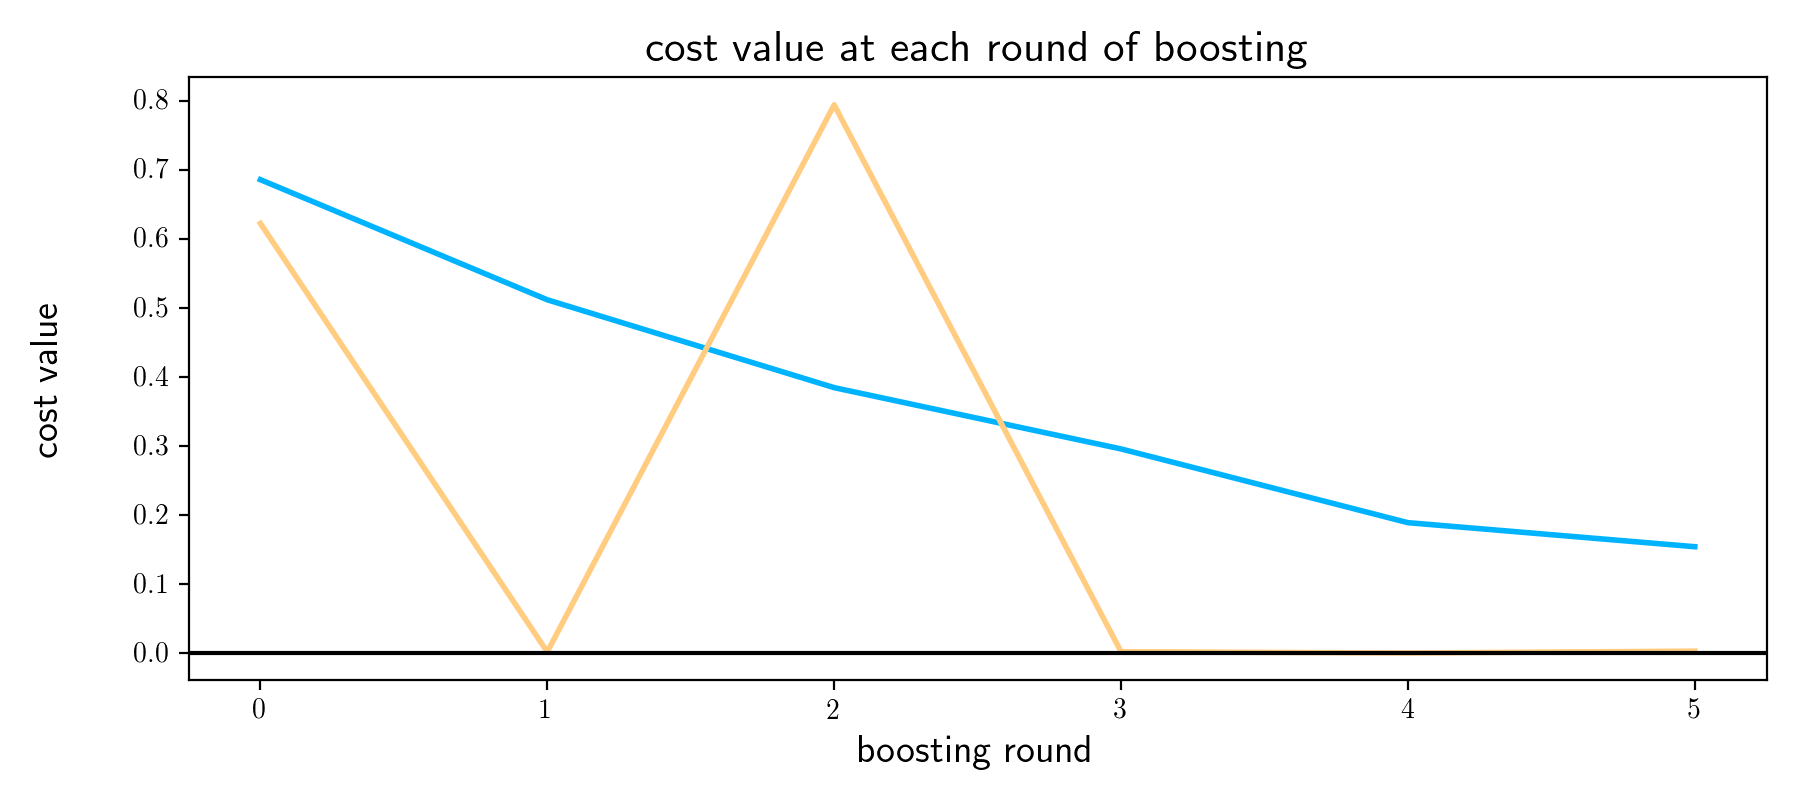

In [26]:
# plot history
mylib.plot_history()

<IPython.core.display.Javascript object>


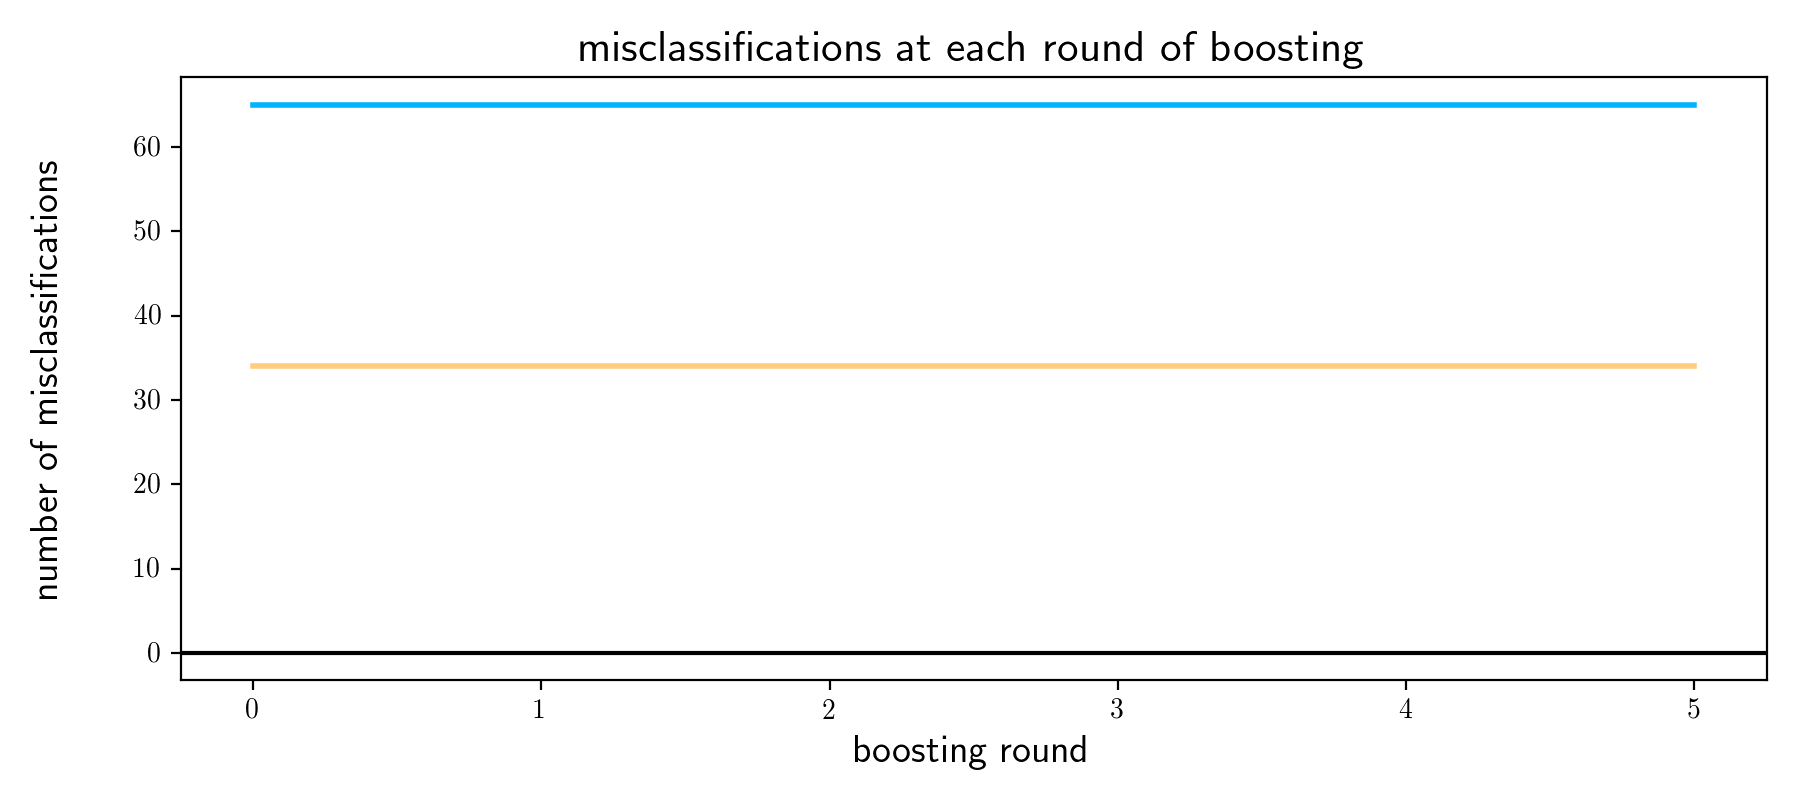

In [27]:
# plot history
mylib.plot_misclass_history()

# Perceptrons

<IPython.core.display.Javascript object>


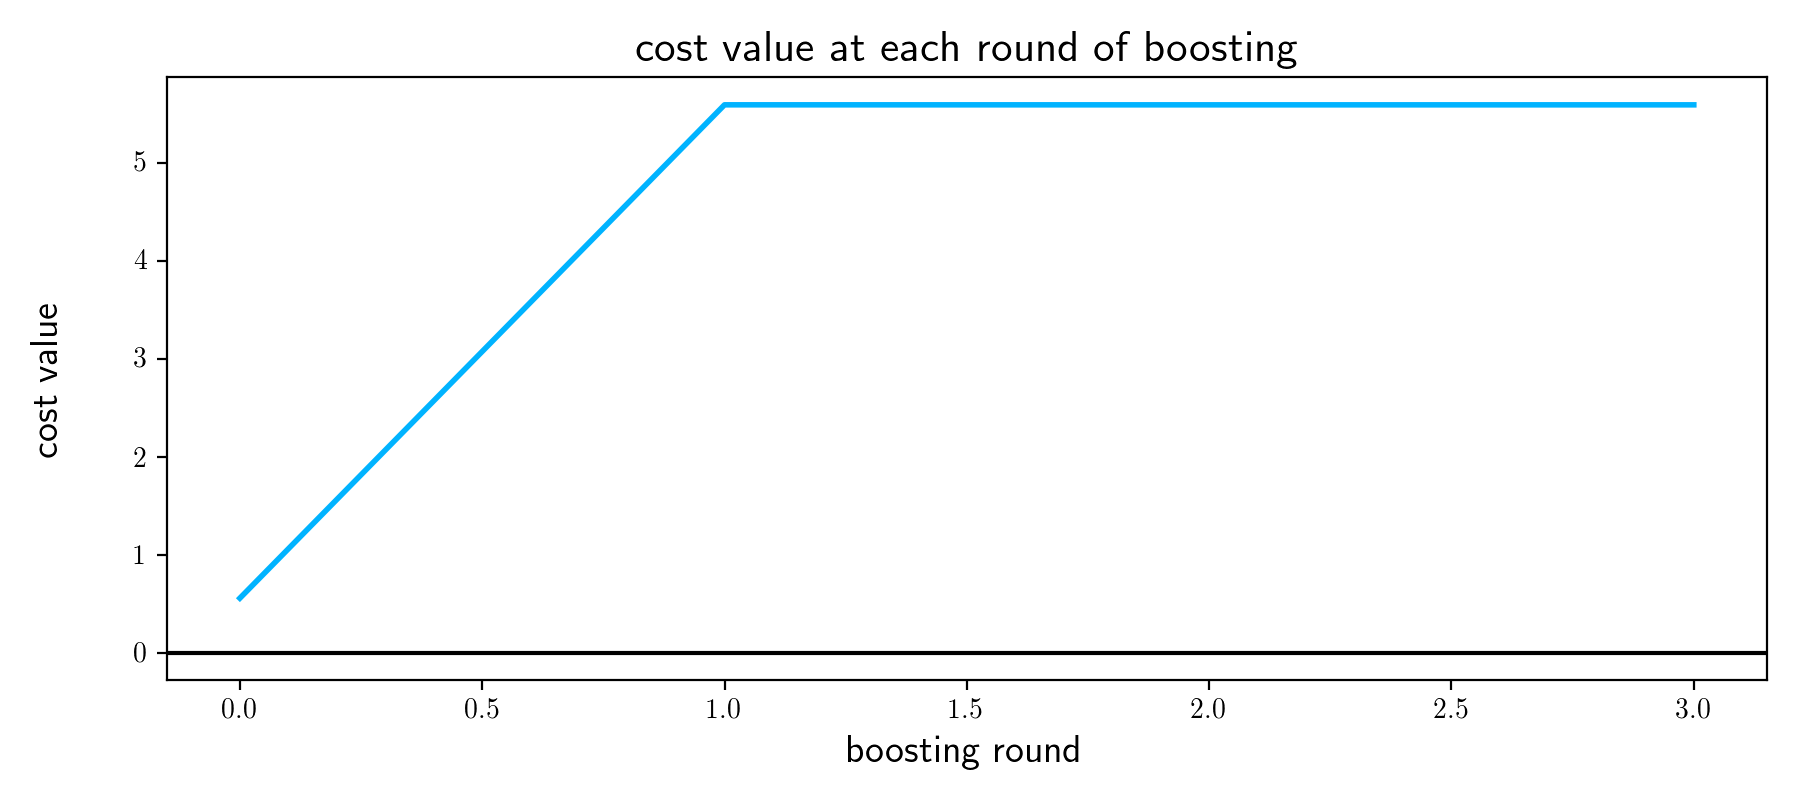

In [160]:
# import data
csvname = datapath + 'noisy_sin_sample.csv'
csvname = datapath + 'universal_regression_samples_0.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:] )

# import booster
mylib = nonlin.boost_lib4.superlearn_setup.Setup(x,y)

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose normalizer
mylib.choose_activation(activation = 'tanh')

# choose normalizer
mylib.make_train_valid_split(train_portion = 0.2)

# choose cost|
mylib.choose_cost(name = 'least_squares')

# choose optimizer
mylib.choose_optimizer('gradient_descent',alpha_choice = 10**(-2),max_its=1000)

# run boosting
mylib.boost(3)

# plot history
mylib.plot_history()

In [161]:
mylib.valid_cost_vals

[0.4275179619930447,
 8.366730323338496,
 0.42772298451127233,
 0.4275385555004688]

In [162]:
mylib.train_cost_vals

[array([0.5591235]),
 array([5.59144861]),
 array([5.59123569]),
 array([5.59123518])]